# Lord's paradoxについて

* 黒木玄
* 2023-01-22

__References__

* https://twitter.com/yudapearl/status/1616051192685277184
* https://en.wikipedia.org/wiki/Lord%27s_paradox

## 準備

<!-- 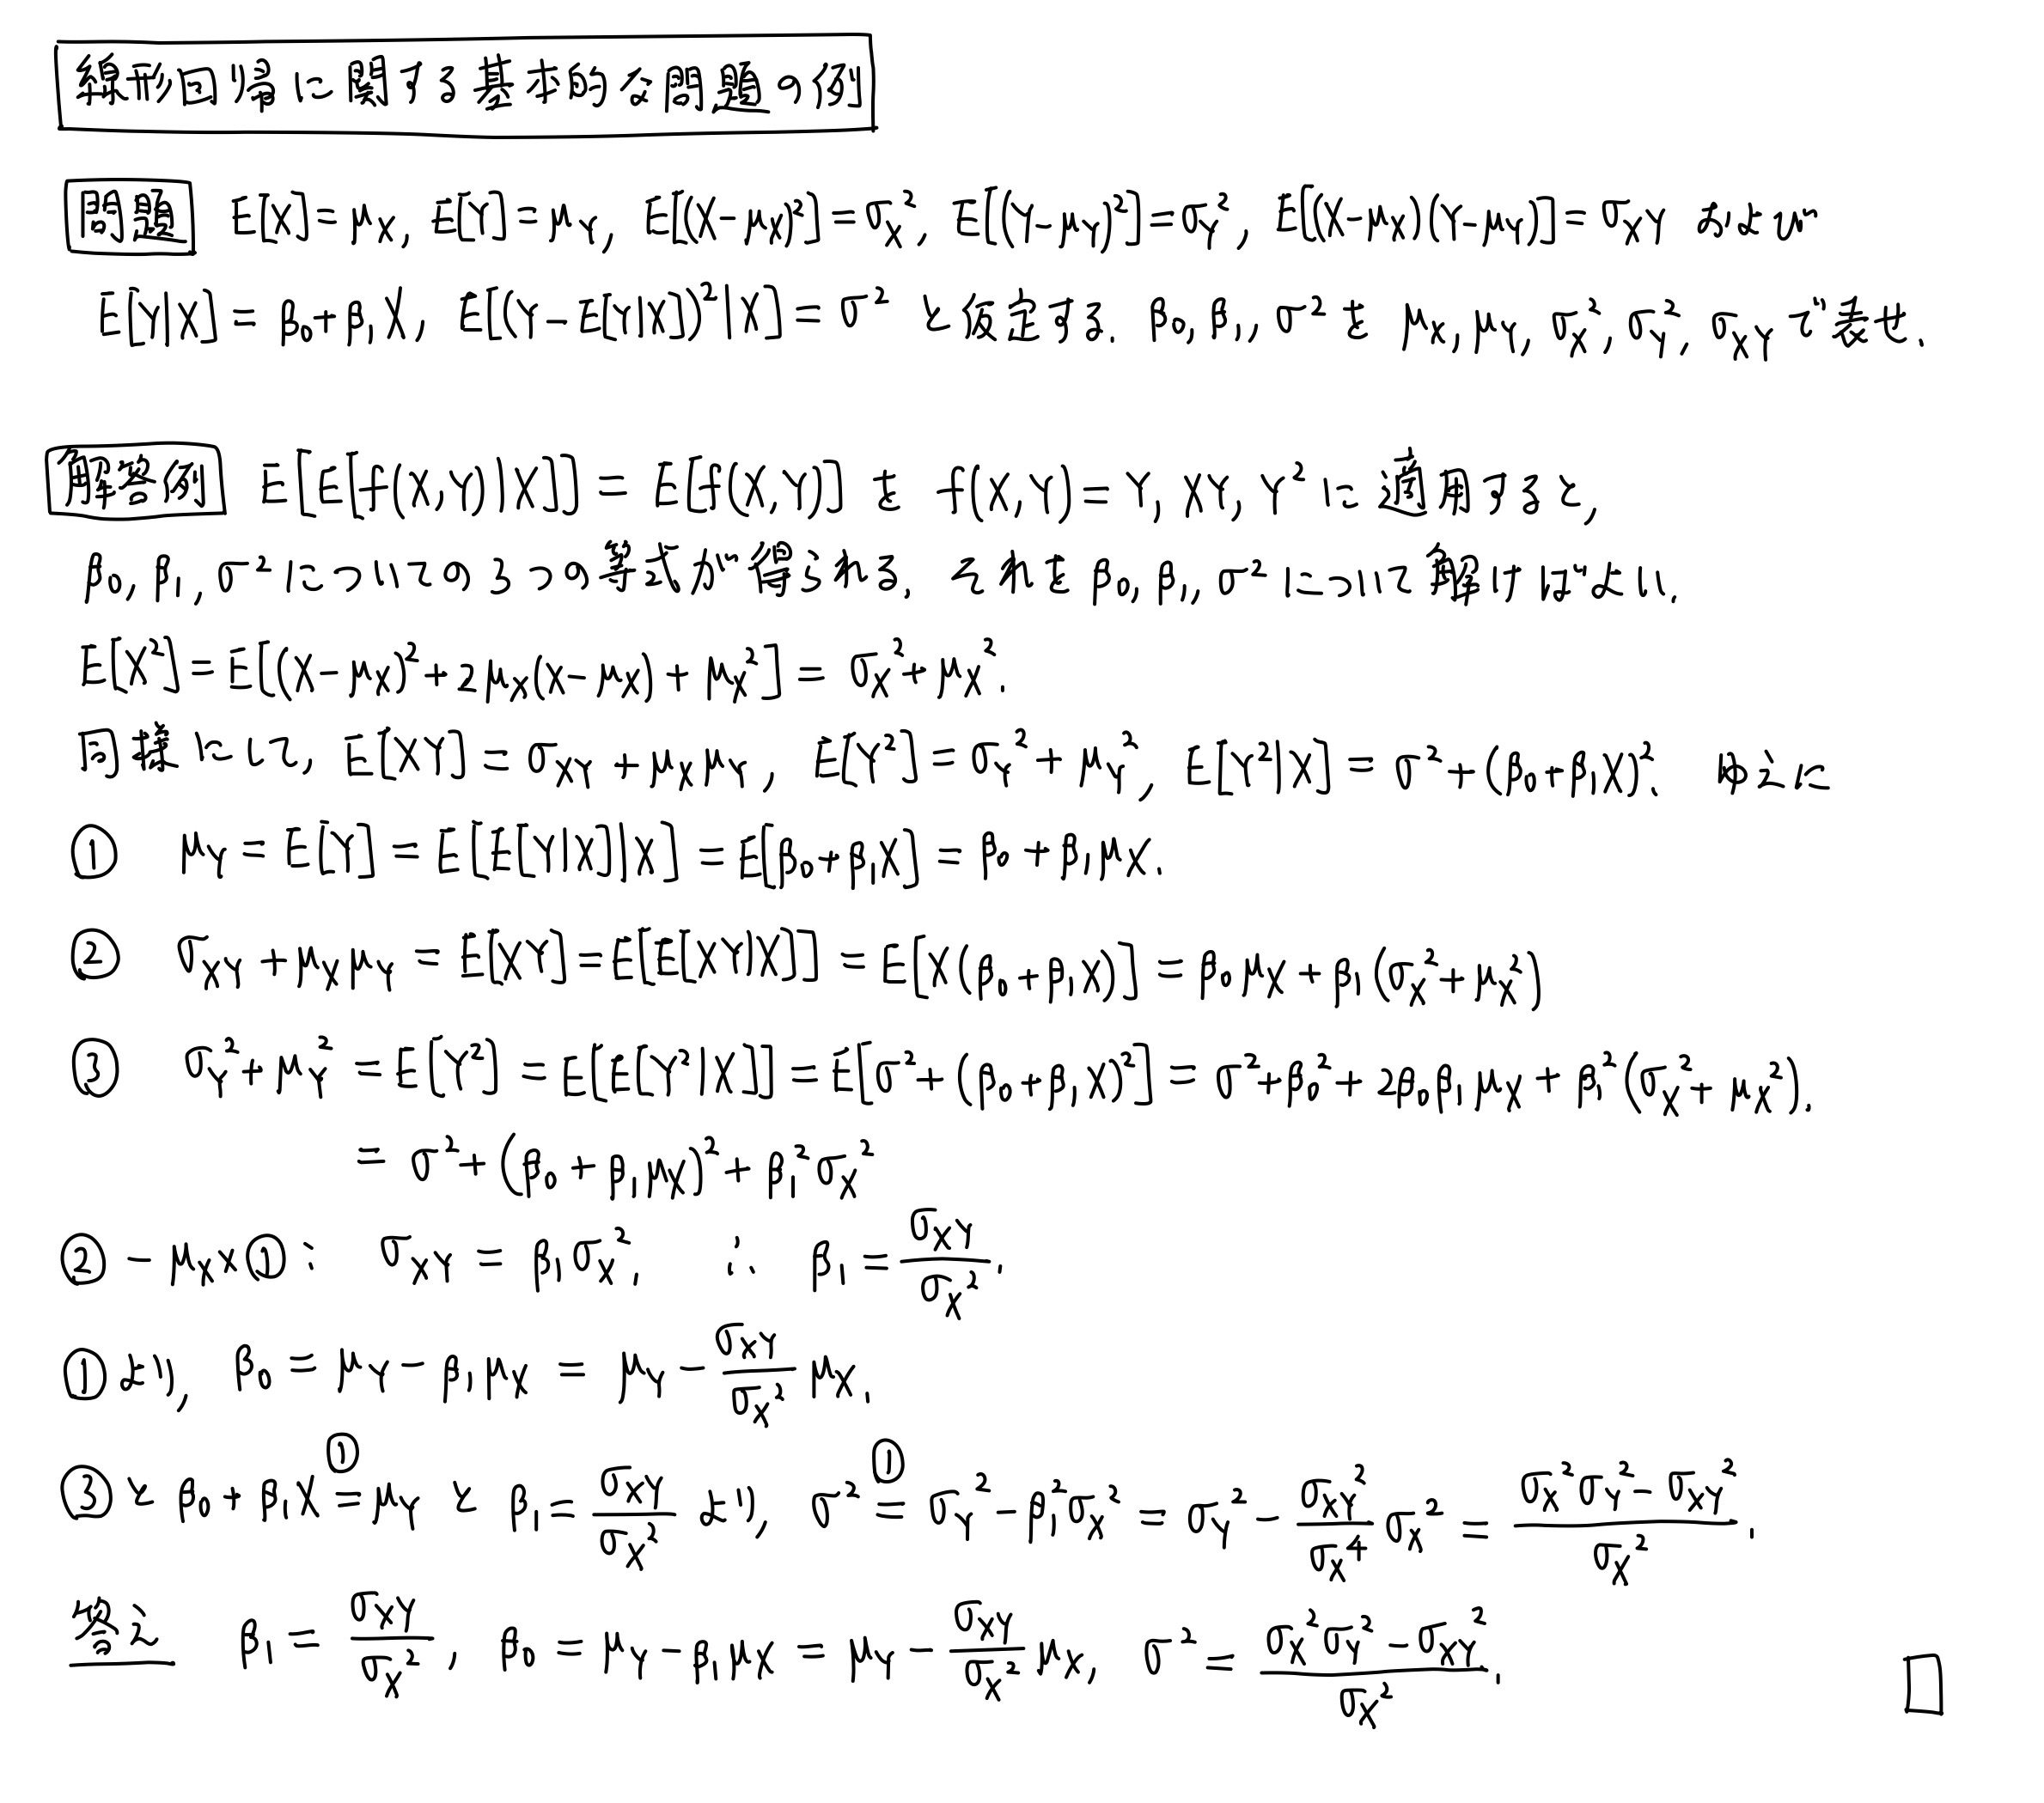 -->
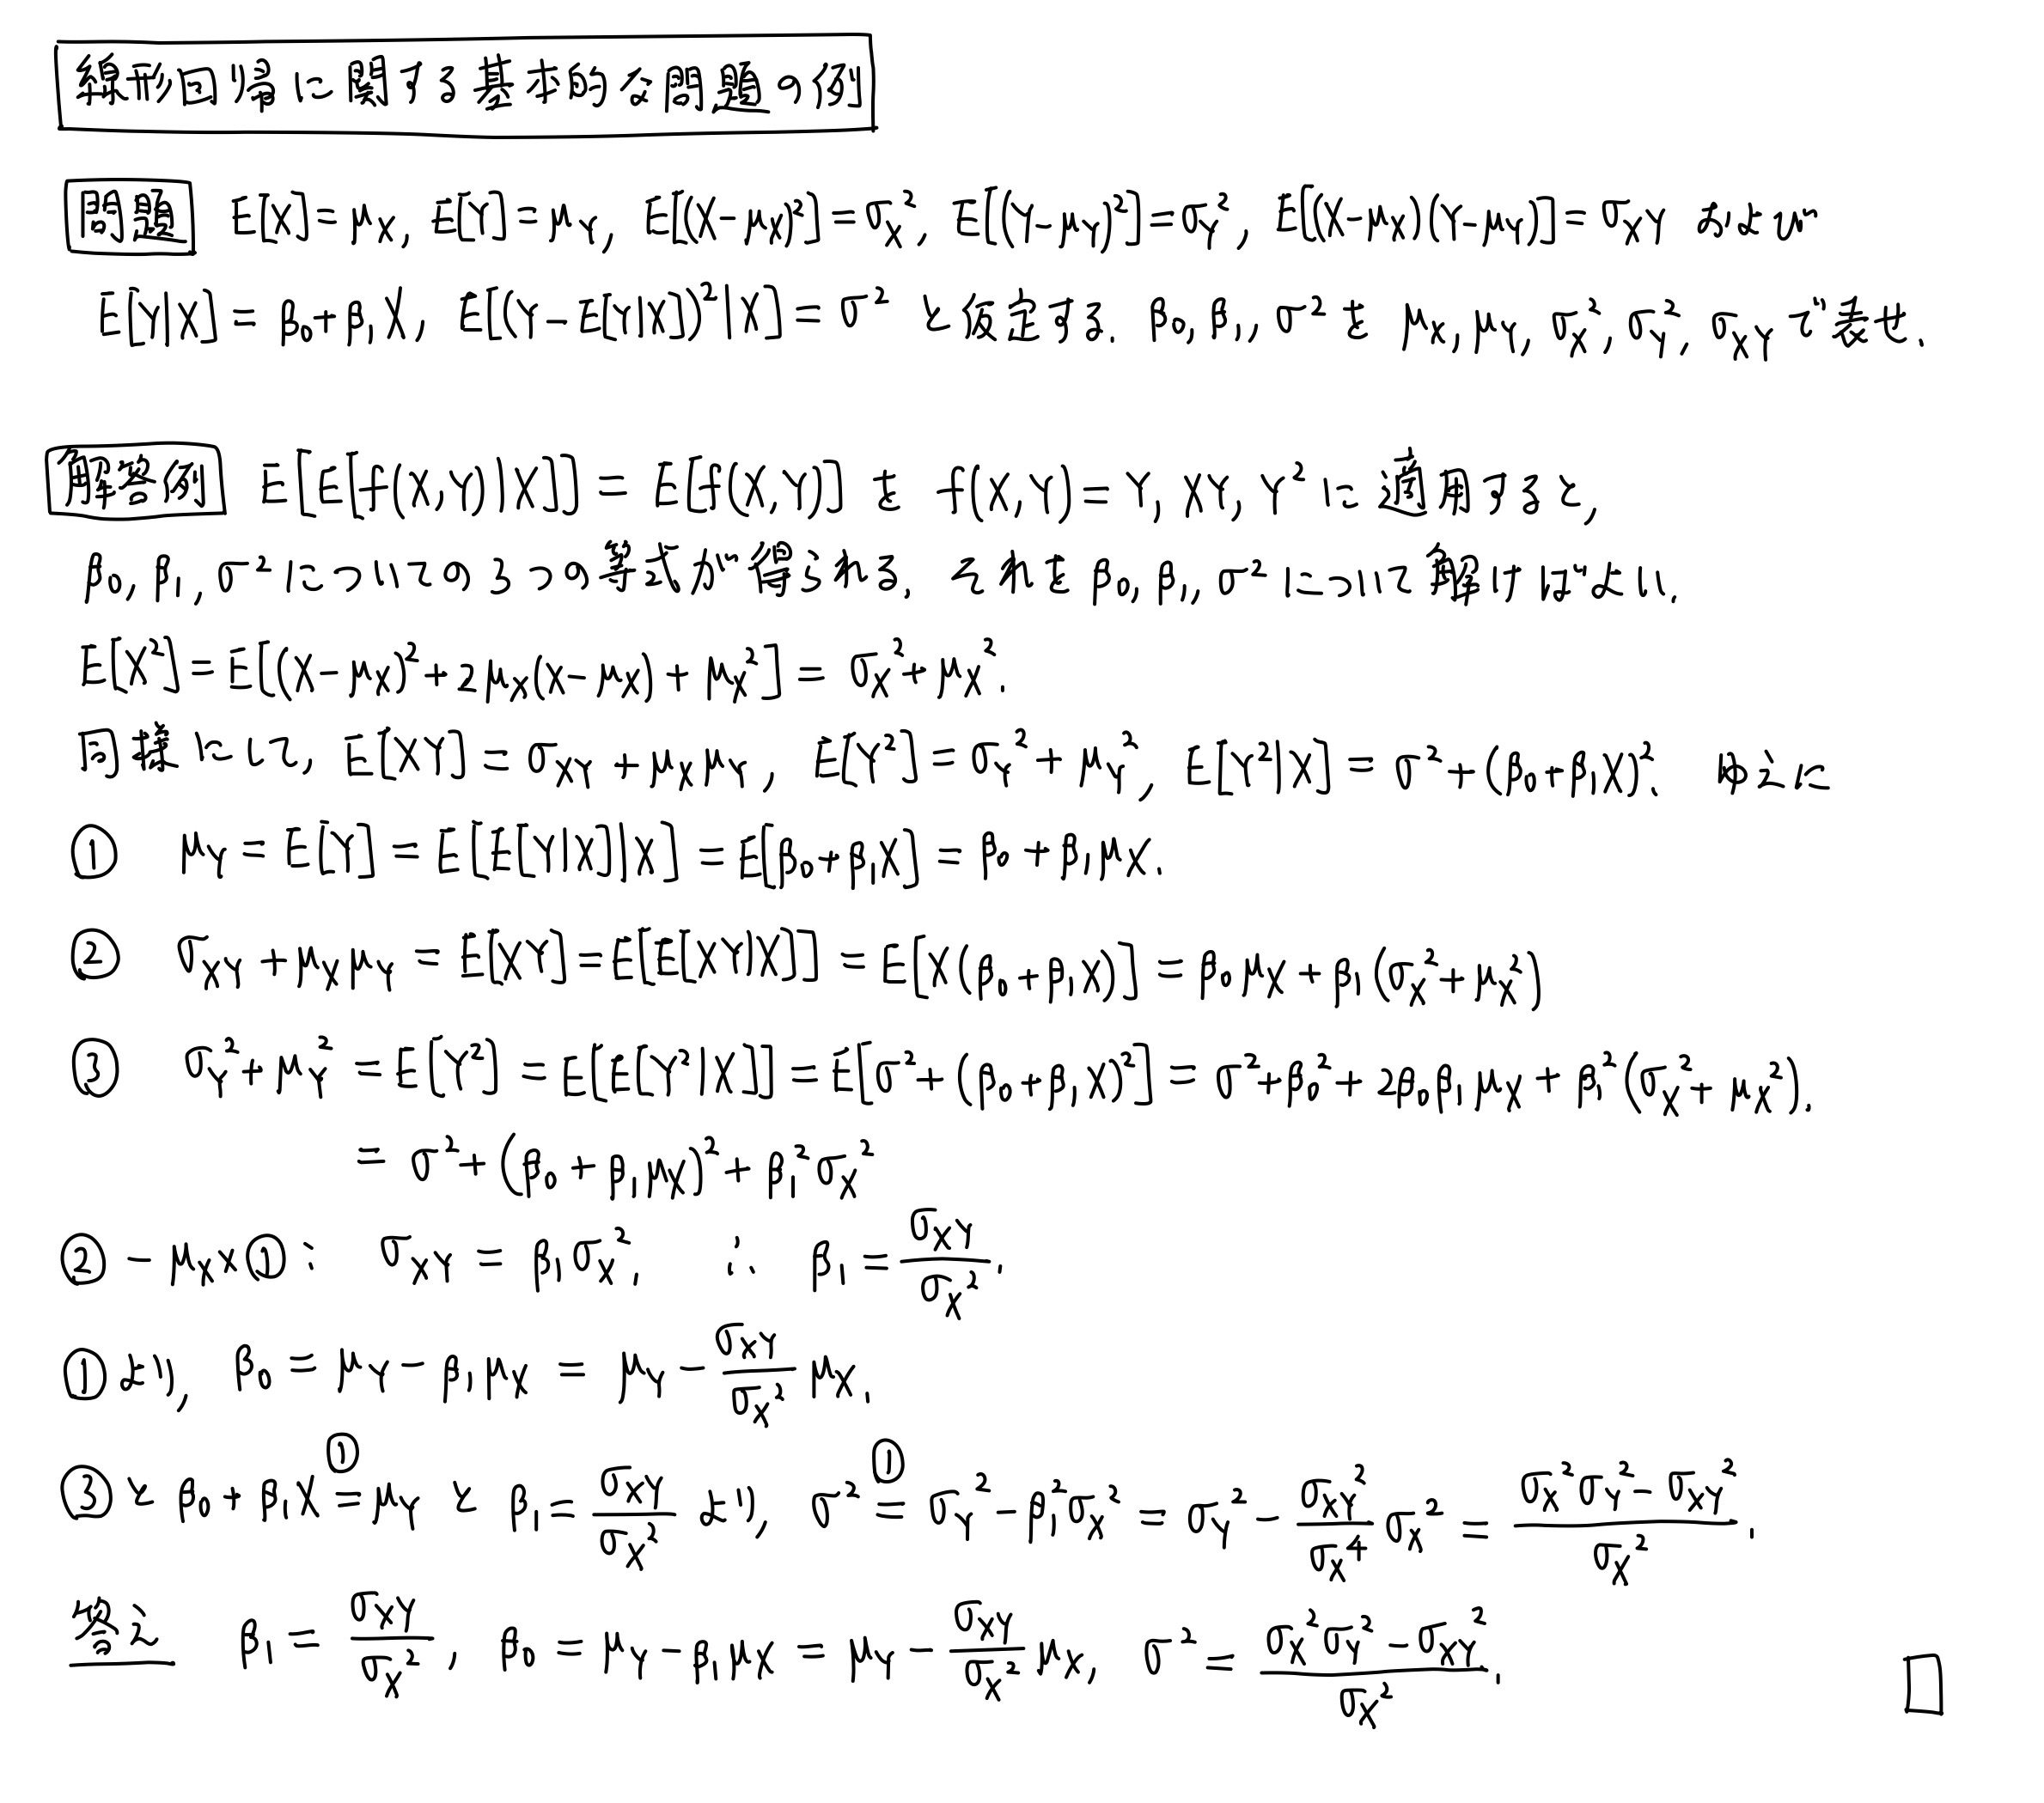

## 2種類の因果モデルに対応する確率分布の表示

$w\in{1,0}$, $x,y\in\mathbb{R}$ に関する同時確率分布を次のように定める:

$$
\begin{aligned}
p(x,y,w) = p(x,y|w)p(w).
\end{aligned}
$$

ここで,

$$
\begin{aligned}
&
p(w) \sim \operatorname{Bernoulli}(\theta),
\\ &
p(x,y|w) \sim \operatorname{MvNormal}\left(
\begin{bmatrix}
\mu_{w,x} \\ \mu_{w,y} \\
\end{bmatrix},
\begin{bmatrix}
\sigma_{w,x}^2 & \sigma_{w,xy}  \\
\sigma_{w,xy}  & \sigma_{w,y}^2 \\
\end{bmatrix}.
\right)
\end{aligned}
$$

このとき, $p(y|x,w)$ と $p(w|x)$, $p(x)$ を求めよう. 

$$
\begin{aligned}
p(x|w) \sim \operatorname{Normal}(\mu_{w,x}, \sigma_{w,X}^2)
\end{aligned}
$$

なので, 

$$
p(x) \sim \operatorname{MixtureModel}(
[\operatorname{Normal}((\mu_{1,x}, \sigma_{1,X}^2), \operatorname{Normal}((\mu_{0,x}, \sigma_{0,X}^2)]
[1/2, 1/2]
)
$$

すなわち,

$$
p(x) = p(x|w=1)p(w=1) + p(x|w=0)p(w=0) = \theta p(x|w=1) + (1-\theta) p(x|w=0).
$$

ゆえに,

$$
p(w|x) = \frac{p(x|w)p(w)}{p(x)} = \begin{cases}
\dfrac{\theta p(x|w=1)}{\theta p(x|w=1) + (1-\theta) p(x|w=0)} & (w=1), \\
\dfrac{(1-\theta) p(x|w=0)}{\theta p(x|w=1) + (1-\theta) p(x|w=0)} & (w=0). \\
\end{cases}
$$

上のセルに引用した手書きのノートの結果より,

$$
p(y|x,w) \sim \operatorname{Normal}(\beta_{w,0} + \beta_{w,1} x,\; \sigma_w^2).
$$

ここで,

$$
\beta_{w,1} = \frac{\sigma_{w,xy}}{\sigma_{w,x}^2}, \quad
\beta_{w,0} = \mu_{w,y} - \beta_{w,1}\mu_{w,x}, \quad
\sigma_w^2 = \frac{\sigma_{w,x}^2\sigma_{w,y}^2 - \sigma_{w,xy}^2}{\sigma_{w,x}^2}.
$$

以上より, 同時確率分布 $p(x,y,w)$ の2つの表示が得られた:

$$
p(x,y,w) = p(y|x,w)p(x|w)p(w) = p(y|x,w)p(w|x)p(x).
$$

この2つの表示は同じ同時確率分布を定めるが, 統計的因果モデルとしては互いに異なるとみなされる:

$$
\begin{array}{ccc}
\begin{array}{ccc}
  & & X & & \\
  & \nearrow & & \searrow & \\ 
W & & \to & & Y \\
\end{array}
&
\qquad
\qquad
\qquad
&
\begin{array}{ccc}
  & & X & & \\
  & \swarrow & & \searrow & \\ 
W & & \to & & Y \\
\end{array}
\\
𝑝(𝑦|𝑥,𝑤)𝑝(𝑥|𝑤)𝑝(𝑤)
& &
𝑝(𝑦|𝑥,𝑤)𝑝(𝑤|𝑥)𝑝(𝑥).
\end{array}
$$

前者の場合には, $W$ の $Y$ への効果を調べるために $X$ で条件付けてはいけない. すなわち, $Y$ の $X$ による回帰を見てはいけない.

後者の場合には, $W$ の $Y$ への効果を調べるときに, $X$ は交絡因子になるので, $X$ で条件付ける必要がある.  すなわち, $Y$ の $X$ による回帰を見る必要がある.

## Lordのパラドックスの確率分布

前節の分布で $\mu_{w,y}=\mu_{w,x}$ ($w=1,0$)の場合がLordのパラドックスで使われているモデルだとみなされる.

$\mu_{1,y}=\mu_{1,x}=55$, $\mu_{0,y}=\mu_{1,x}=70$, $\sigma_{w,x}^2 = \sigma_{w,y}^2 = 10^2 = 100$, $\sigma_{w,xy}=50$ ($w=1,0$), $\theta=1/2$ の場合に2通りの方法でサンプルを生成してみる.

In [1]:
using Distributions
using LinearAlgebra
dot2(x) = LinearAlgebra.dot(x, x)
using StatsPlots
default(fmt=:png)

In [2]:
μ₁x::Float64 = 55
μ₁y::Float64 = 55
μ₀x::Float64 = 70
μ₀y::Float64 = 70
σ₁x²::Float64 = 100
σ₁y²::Float64 = 100
σ₀x²::Float64 = 100
σ₀y²::Float64 = 100
σ₁xy::Float64 = 50
σ₀xy::Float64 = 50

@show β₁₁::Float64 = σ₁xy/σ₁x²
@show β₀₁::Float64 = σ₀xy/σ₀x²
@show β₁₀::Float64 = μ₁y - β₁₁*μ₁x
@show β₀₀::Float64 = μ₀y - β₀₁*μ₀x
@show σ₁²::Float64 = (σ₁x²*σ₁y² - σ₁xy^2)/σ₁x²
@show σ₀²::Float64 = (σ₀x²*σ₀y² - σ₀xy^2)/σ₀x²
println()
@show θ::Float64 = 1/2

distw() = Bernoulli(θ)
distx(w) = w == 1 ? Normal(μ₁x, √σ₁²) : Normal(μ₀x, √σ₀²)
distx() = MixtureModel([distx(1), distx(0)], [θ, 1-θ])
distw(x) = Bernoulli(pdf(distx(1), x)*pdf(distw(), 1)/pdf(distx(), x))
disty(x, w) = w == 1 ? Normal(β₁₀+β₁₁*x, √σ₁²) : Normal(β₀₀+β₀₁*x, √σ₀²)
distxy(w) = if w == 1
    MvNormal([μ₁x, μ₁y], [σ₁x² σ₁xy; σ₁xy σ₁y²])
else
    MvNormal([μ₀x, μ₀y], [σ₀x² σ₀xy; σ₀xy σ₀y²])
end
distxy() = MixtureModel([distxy(1), distxy(0)], [θ, 1-θ])

println()
@show distw()
println()
@show distx()
println()
@show distxy();

β₁₁::Float64 = σ₁xy / σ₁x² = 0.5
β₀₁::Float64 = σ₀xy / σ₀x² = 0.5
β₁₀::Float64 = μ₁y - β₁₁ * μ₁x = 27.5
β₀₀::Float64 = μ₀y - β₀₁ * μ₀x = 35.0
σ₁²::Float64 = (σ₁x² * σ₁y² - σ₁xy ^ 2) / σ₁x² = 75.0
σ₀²::Float64 = (σ₀x² * σ₀y² - σ₀xy ^ 2) / σ₀x² = 75.0

θ::Float64 = 1 / 2 = 0.5

distw() = Bernoulli{Float64}(p=0.5)

distx() = MixtureModel{Normal{Float64}}(K = 2)
components[1] (prior = 0.5000): Normal{Float64}(μ=55.0, σ=8.660254037844387)
components[2] (prior = 0.5000): Normal{Float64}(μ=70.0, σ=8.660254037844387)


distxy() = MixtureModel{FullNormal}(K = 2)
components[1] (prior = 0.5000): FullNormal(
dim: 2
μ: [55.0, 55.0]
Σ: [100.0 50.0; 50.0 100.0]
)

components[2] (prior = 0.5000): FullNormal(
dim: 2
μ: [70.0, 70.0]
Σ: [100.0 50.0; 50.0 100.0]
)




In [3]:
function plot_data(XYW; ms=1, alpha=0.3, xlim=(10, 110), ylim=(10, 110), kwargs...)
    X1 = [x for (x,y,w) in XYW if w==1]
    Y1 = [y for (x,y,w) in XYW if w==1]
    X0 = [x for (x,y,w) in XYW if w==0]
    Y0 = [y for (x,y,w) in XYW if w==0]
    @show mean(X1), mean(Y1), mean(X0), mean(Y0), length(X1)/length(XYW)
    
    P1 = scatter(X1, Y1; label="", c=1, msc=:auto, ms, alpha, xlim, ylim)
    plot!(collect(xlim), collect(xlim); label="", c=:black, ls=:dot, alpha=0.5)
    plot!(collect(xlim), x->β₁₀+β₁₁*x; label="", c=:blue)
    
    P0 = scatter(X0, Y0; label="", c=2, msc=:auto, ms, alpha, xlim, ylim)
    plot!(collect(xlim), collect(xlim); label="", c=:black, ls=:dot, alpha=0.5)
    plot!(collect(xlim), x->β₀₀+β₀₁*x; label="", c=:red)
    
    plot(P1, P0; size=(600, 300), layout=(1, 2))
    plot!(; kwargs...)
end

plot_data (generic function with 1 method)

(mean(X1), mean(Y1), mean(X0), mean(Y0), length(X1) / length(XYW)) = (55.198040099728935, 55.24751536972555, 70.1696179868696, 70.18777370487653, 0.504)
(mean(X1), mean(Y1), mean(X0), mean(Y0), length(X1) / length(XYW)) = (54.83710522545311, 55.03390131227999, 70.17628770781701, 70.01053003570894, 0.5026)
(mean(X1), mean(Y1), mean(X0), mean(Y0), length(X1) / length(XYW)) = (55.06358896514096, 54.70257923630227, 69.96519361424019, 69.75348845314234, 0.5039)


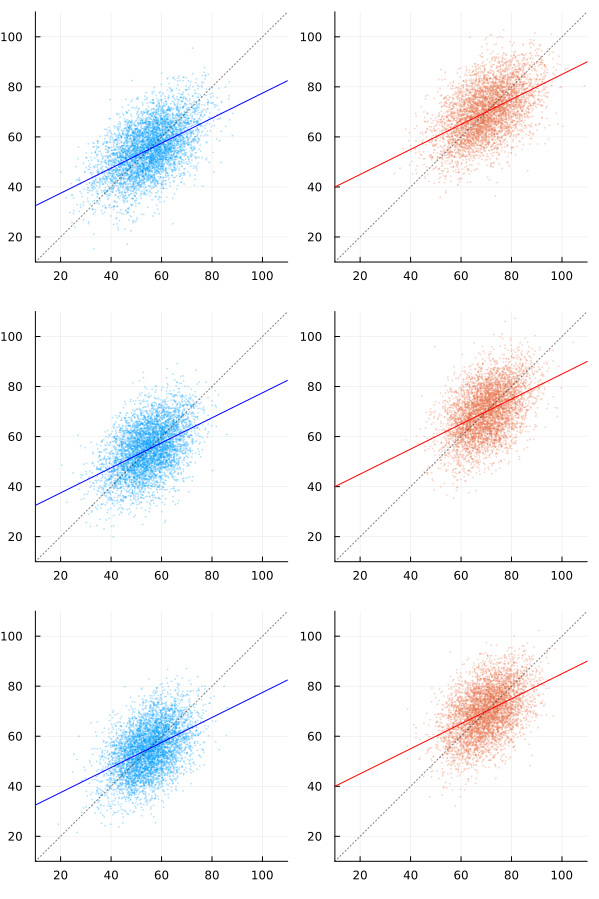

In [4]:
n = 10000

XYW1 = [(w = rand(distw()); (x, y) = rand(distxy(w)); (x, y, w)) for _ in 1:n]
P1 = plot_data(XYW1)

XYW2 = [(w = rand(distw()); x = rand(distx(w)); (x, rand(disty(x, w)), w)) for _ in 1:n]
P2 = plot_data(XYW2)

XYW3 = [(x = rand(distx()); w = rand(distw(x)); (x, rand(disty(x, w)), w)) for _ in 1:n]
P3 = plot_data(XYW3)

plot(P1, P2, P3; size=(600, 900), layout=(3, 1))

In [5]:
function plot_data2(XYW; ms=1, alpha=0.3, xlim=(10, 110), ylim=(10, 110), kwargs...)
    X1 = [x for (x,y,w) in XYW if w==1]
    Y1 = [y for (x,y,w) in XYW if w==1]
    X0 = [x for (x,y,w) in XYW if w==0]
    Y0 = [y for (x,y,w) in XYW if w==0]
    @show mean(X1), mean(Y1), mean(X0), mean(Y0), length(X1)/length(XYW)
    
    plot()
    scatter!(X1, Y1; label="", c=1, msc=:auto, ms, alpha, xlim, ylim)
    plot!(collect(xlim), collect(xlim); label="", c=:black, ls=:dot, alpha=0.5)
    plot!(collect(xlim), x->β₁₀+β₁₁*x; label="", c=:blue)
    scatter!(X0, Y0; label="", c=2, msc=:auto, ms, alpha, xlim, ylim)
    plot!(collect(xlim), collect(xlim); label="", c=:black, ls=:dot, alpha=0.5)
    plot!(collect(xlim), x->β₀₀+β₀₁*x; label="", c=:red)
end

plot_data2 (generic function with 1 method)

(mean(X1), mean(Y1), mean(X0), mean(Y0), length(X1) / length(XYW)) = (54.98985880488354, 55.08520831214299, 69.88104012882943, 70.09763077458436, 0.5051)
(mean(X1), mean(Y1), mean(X0), mean(Y0), length(X1) / length(XYW)) = (54.87506798463431, 54.87673211835178, 70.12240490453367, 70.15716878561787, 0.5)
(mean(X1), mean(Y1), mean(X0), mean(Y0), length(X1) / length(XYW)) = (55.26206758252868, 55.01910260341469, 70.08094498057682, 70.11048830526293, 0.501)


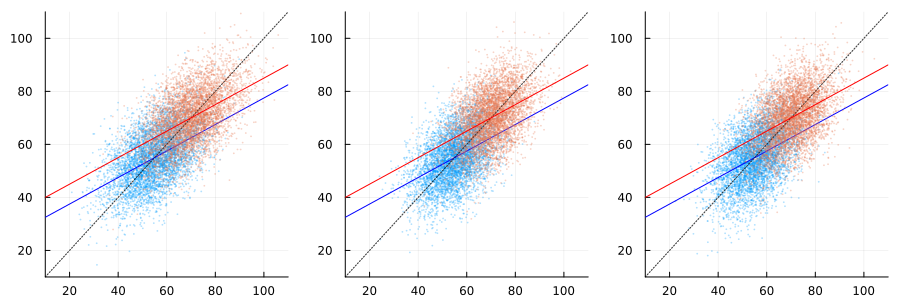

In [6]:
n = 10000

XYW1 = [(w = rand(distw()); (x, y) = rand(distxy(w)); (x, y, w)) for _ in 1:n]
P1 = plot_data2(XYW1)

XYW2 = [(w = rand(distw()); x = rand(distx(w)); (x, rand(disty(x, w)), w)) for _ in 1:n]
P2 = plot_data2(XYW2)

XYW3 = [(x = rand(distx()); w = rand(distw(x)); (x, rand(disty(x, w)), w)) for _ in 1:n]
P3 = plot_data2(XYW3)

plot(P1, P2, P3; size=(900, 300), layout=(1, 3))